In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df1 = df[['Pclass','Sex','Age','Fare','Survived']]

In [4]:
df1

,Pclass,Sex,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0
...,...,...,...,...,...
886,2,male,27.0,13.0000,0
887,1,female,19.0,30.0000,1
888,3,female,NaN,23.4500,0
889,1,male,26.0,30.0000,1


In [5]:
df1.groupby('Age').describe()

Pclass                                            Fare            ...  \
       count mean       std  min   25%  50%   75%  max count      mean  ...   
Age                                                                     ...   
0.42     1.0  3.0       NaN  3.0  3.00  3.0  3.00  3.0   1.0    8.5167  ...   
0.67     1.0  2.0       NaN  2.0  2.00  2.0  2.00  2.0   1.0   14.5000  ...   
0.75     2.0  3.0  0.000000  3.0  3.00  3.0  3.00  3.0   2.0   19.2583  ...   
0.83     2.0  2.0  0.000000  2.0  2.00  2.0  2.00  2.0   2.0   23.8750  ...   
0.92     1.0  1.0       NaN  1.0  1.00  1.0  1.00  1.0   1.0  151.5500  ...   
...      ...  ...       ...  ...   ...  ...   ...  ...   ...       ...  ...   
70.00    2.0  1.5  0.707107  1.0  1.25  1.5  1.75  2.0   2.0   40.7500  ...   
70.50    1.0  3.0       NaN  3.0  3.00  3.0  3.00  3.0   1.0    7.7500  ...   
71.00    2.0  1.0  0.000000  1.0  1.00  1.0  1.00  1.0   2.0   42.0792  ...   
74.00    1.0  3.0       NaN  3.0  3.00  3.0  3.00  3.0   1.0    7.7750  ...   
80.00    1.0  1.0       NaN  1.0  1.00  1.0  1.00  1.0   1.0   30.0000  ...   

                          Survived                                     
            75%       max    count mean  std  min  25%  50%  75%  max  
Age                                                                    
0.42     8.5167    8.5167      1.0  1.0  NaN  1.0  1.0  1.0  1.0  1.0  
0.67    14.5000   14.5000      1.0  1.0  NaN  1.0  1.0  1.0  1.0  1.0  
0.75    19.2583   19.2583      2.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  
0.83    26.4375   29.0000      2.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  
0.92   151.5500  151.5500      1.0  1.0  NaN  1.0  1.0  1.0  1.0  1.0  
...         ...       ...      ...  ...  ...  ...  ...  ...  ...  ...  
70.00   55.8750   71.0000      2.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
70.50    7.7500    7.7500      1.0  0.0  NaN  0.0  0.0  0.0  0.0  0.0  
71.00   45.7917   49.5042      2.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
74.00    7.7750    7.7750      1.0  0.0  NaN  0.0  0.0  0.0  0.0  0.0  
80.00   30.0000   30.0000      1.0  1.0  NaN  1.0  1.0  1.0  1.0  1.0  

[88 rows x 24 columns]

In [6]:
df1.isnull().sum()

Pclass        0
Sex           0
Age         177
Fare          0
Survived      0
dtype: int64

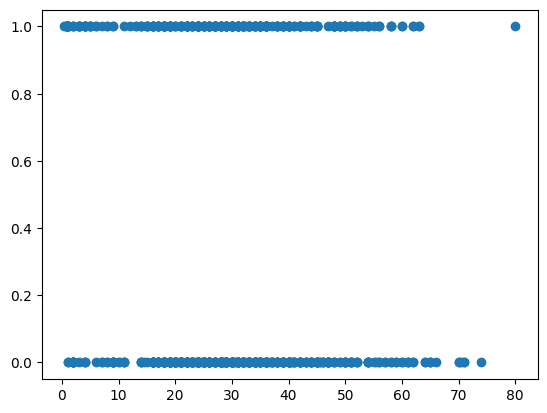

In [7]:
plt.scatter(df1.Age, df1.Survived)

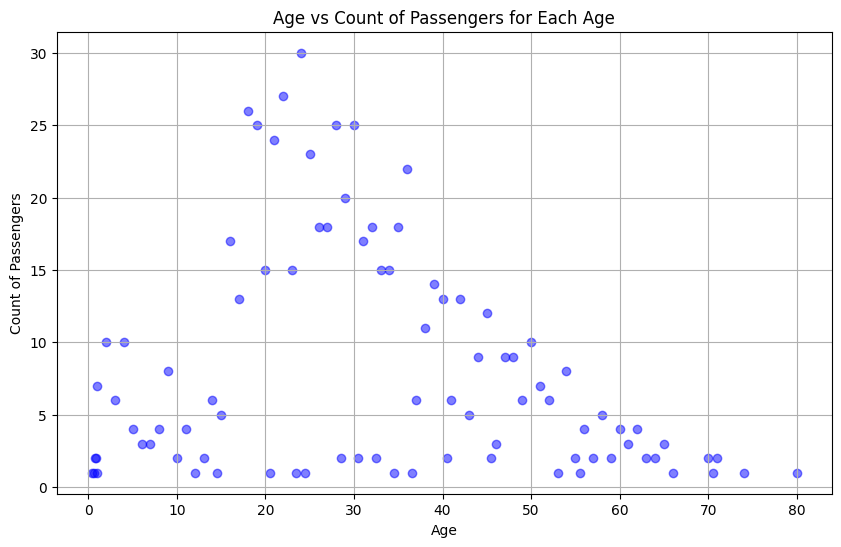

In [8]:
age_counts = df1.groupby('Age').size()

# Plot Age vs Age Count
plt.figure(figsize=(10, 6))
plt.scatter(age_counts.index, age_counts.values, color='blue', alpha=0.5)
plt.title('Age vs Count of Passengers for Each Age')
plt.xlabel('Age')
plt.ylabel('Count of Passengers')
plt.grid(True)
plt.show()

In [9]:
mean_age = math.floor(df1['Age'].mean())
mean_age

29

In [10]:
median_age = math.floor(df1['Age'].median())
median_age

28

In [11]:
df1 = df1.fillna(mean_age)
df1

,Pclass,Sex,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0
...,...,...,...,...,...
886,2,male,27.0,13.0000,0
887,1,female,19.0,30.0000,1
888,3,female,29.0,23.4500,0
889,1,male,26.0,30.0000,1


In [12]:
sex_dummies = pd.get_dummies(df1['Sex'], drop_first=False).astype(int)
df1 = pd.concat([df1,sex_dummies] , axis=1)
df1

,Pclass,Sex,Age,Fare,Survived,female,male
0,3,male,22.0,7.2500,0,0,1
1,1,female,38.0,71.2833,1,1,0
2,3,female,26.0,7.9250,1,1,0
3,1,female,35.0,53.1000,1,1,0
4,3,male,35.0,8.0500,0,0,1
...,...,...,...,...,...,...,...
886,2,male,27.0,13.0000,0,0,1
887,1,female,19.0,30.0000,1,1,0
888,3,female,29.0,23.4500,0,1,0
889,1,male,26.0,30.0000,1,0,1


In [13]:
tdf = pd.read_csv('test.csv')
tdf = tdf.fillna(median_age)
tdf = pd.concat([tdf,sex_dummies] , axis=1)
tdf

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female,male
0,892.0,3.0,"Kelly, Mr. James",male,34.5,0.0,0.0,330911,7.8292,28,Q,0,1
1,893.0,3.0,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1.0,0.0,363272,7.0000,28,S,1,0
2,894.0,2.0,"Myles, Mr. Thomas Francis",male,62.0,0.0,0.0,240276,9.6875,28,Q,1,0
3,895.0,3.0,"Wirz, Mr. Albert",male,27.0,0.0,0.0,315154,8.6625,28,S,1,0
4,896.0,3.0,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1.0,1.0,3101298,12.2875,28,S,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1
887,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
888,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
889,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1


In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df1[['Pclass','Age','Fare','male','female']],df1.Survived, train_size = 0.6)

In [47]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()

In [48]:
log_model.fit(x_train, y_train)

LogisticRegression()

In [49]:
log_model.score(x_test, y_test)

0.7759103641456583

In [50]:
from sklearn.svm import SVC
svc_model = SVC(kernel='linear')

In [51]:
svc_model.fit(x_train, y_train)

SVC(kernel='linear')

In [52]:
svc_model.score(x_test, y_test)

0.7675070028011205

In [53]:
from sklearn.ensemble import RandomForestClassifier
ran_model = RandomForestClassifier()

In [54]:
ran_model.fit(x_train, y_train)

RandomForestClassifier()

In [55]:
ran_model.score(x_test, y_test)

0.803921568627451

In [56]:
tdf

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female,male
0,892,3.0,"Kelly, Mr. James",male,34.5,0.0,0.0,330911,7.8292,28,Q,0,1
1,893,3.0,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1.0,0.0,363272,7.0000,28,S,1,0
2,894,2.0,"Myles, Mr. Thomas Francis",male,62.0,0.0,0.0,240276,9.6875,28,Q,1,0
3,895,3.0,"Wirz, Mr. Albert",male,27.0,0.0,0.0,315154,8.6625,28,S,1,0
4,896,3.0,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1.0,1.0,3101298,12.2875,28,S,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3.0,"Spector, Mr. Woolf",male,28.0,0.0,0.0,A.5. 3236,8.0500,28,S,0,1
414,1306,1.0,"Oliva y Ocana, Dona. Fermina",female,39.0,0.0,0.0,PC 17758,108.9000,C105,C,0,1
415,1307,3.0,"Saether, Mr. Simon Sivertsen",male,38.5,0.0,0.0,SOTON/O.Q. 3101262,7.2500,28,S,1,0
416,1308,3.0,"Ware, Mr. Frederick",male,28.0,0.0,0.0,359309,8.0500,28,S,1,0


In [57]:
tdf = tdf[tdf['PassengerId'].notna()]
ran_model.predict(tdf[['Pclass','Age','Fare','male','female']])

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,

In [58]:

tdf['PassengerId'] = pd.to_numeric(tdf['PassengerId'], errors='coerce').astype('Int32')

predictions = log_model.predict(tdf[['Pclass', 'Age', 'Fare', 'male', 'female']])


submission_df = pd.DataFrame({
    'PassengerId': tdf['PassengerId'],
    'Survived': predictions
})

submission_df.to_csv('submission.csv', index=False)

